<a href="https://colab.research.google.com/github/paluigi/AI-IoT-Bootcamp/blob/master/sentanalysisEXAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
#import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import nltk



In [ ]:
!git clone https://github.com/paluigi/AI-IoT-Bootcamp.git


Cloning into 'AI-IoT-Bootcamp'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 55 (delta 20), reused 22 (delta 4), pack-reused 0
Unpacking objects: 100% (55/55), done.
Checking out files: 100% (15/15), done.


In [ ]:
train_df = pd.read_csv("/content/AI-IoT-Bootcamp/datasets/drugs_reviews/drugsComTrain_raw.csv")
print(train_df)
test_df=pd.read_csv("/content/AI-IoT-Bootcamp/datasets/drugs_reviews/drugsComTrain_raw.csv")
print(test_df)

        uniqueID                  drugName  ...       date usefulCount
0         206461                 Valsartan  ...  20-May-12          27
1          95260                Guanfacine  ...  27-Apr-10         192
2          92703                    Lybrel  ...  14-Dec-09          17
3         138000                Ortho Evra  ...   3-Nov-15          10
4          35696  Buprenorphine / naloxone  ...  27-Nov-16          37
...          ...                       ...  ...        ...         ...
161292    191035                   Campral  ...  31-May-15         125
161293    127085            Metoclopramide  ...   1-Nov-11          34
161294    187382                   Orencia  ...  15-Mar-14          35
161295     47128        Thyroid desiccated  ...  19-Sep-15          79
161296    215220              Lubiprostone  ...  13-Dec-14         116

[161297 rows x 7 columns]
        uniqueID                  drugName  ...       date usefulCount
0         206461                 Valsartan  ...  2

Tokenizing the Data


In [ ]:
#print(train_df['rating'])

(array([21619.,  6931.,  6513.,  5012.,  8013.,  6343.,  9456., 18890.,
        27531., 50989.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

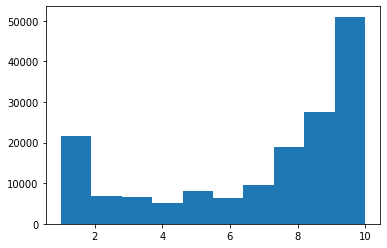

In [ ]:
plt.hist(train_df['rating'])

Raggruppare in due (positivo o negativo) (teoricamente sarebbe meglio se le altezze degli istogrammi fossero tutte bilanciate)


In [ ]:
g1=[]
for i in train_df['rating']:
  if train_df['rating'][i]<=6:
    g1.append(0)
  else:
    g1.append(1)

In [ ]:
g2=[]
for i in test_df['rating']:
  if test_df['rating'][i]<=6:
    g2.append(0)
  else:
    g2.append(1)

In [ ]:
#train_df.info()

In [ ]:
train_df.drop(columns='rating',  inplace=True)
test_df.drop(columns='rating',  inplace=True)

In [ ]:
#type(g1)

In [ ]:
train_df['g1']=pd.DataFrame(g1)
train_df

,uniqueID,drugName,condition,review,date,usefulCount,g1
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",20-May-12,27,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",27-Apr-10,192,0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",14-Dec-09,17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",3-Nov-15,10,0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",27-Nov-16,37,1
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",31-May-15,125,1
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1-Nov-11,34,1
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",15-Mar-14,35,0
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",19-Sep-15,79,1


In [ ]:
test_df['g2']=pd.DataFrame(g2)
test_df

,uniqueID,drugName,condition,review,date,usefulCount,g2
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",20-May-12,27,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",27-Apr-10,192,0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",14-Dec-09,17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",3-Nov-15,10,0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",27-Nov-16,37,1
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",31-May-15,125,1
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1-Nov-11,34,1
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",15-Mar-14,35,0
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",19-Sep-15,79,1


In [ ]:
data=train_df[['review','g1']]
data1 = data[data['g1']==1]
data0 = data[data['g1']==0]
data

,review,g1
0,"""It has no side effect, I take it in combinati...",1
1,"""My son is halfway through his fourth week of ...",0
2,"""I used to take another oral contraceptive, wh...",0
3,"""This is my first time using any form of birth...",0
4,"""Suboxone has completely turned my life around...",1
...,...,...
161292,"""I wrote my first report in Mid-October of 201...",1
161293,"""I was given this in IV before surgey. I immed...",1
161294,"""Limited improvement after 4 months, developed...",0
161295,"""I&#039;ve been on thyroid medication 49 years...",1


In [ ]:
datatest=test_df[['review','g2']]
datat1 = datatest[datatest['g2']==1]
datat0 = datatest[datatest['g2']==0]
datatest

,review,g2
0,"""It has no side effect, I take it in combinati...",1
1,"""My son is halfway through his fourth week of ...",0
2,"""I used to take another oral contraceptive, wh...",0
3,"""This is my first time using any form of birth...",0
4,"""Suboxone has completely turned my life around...",1
...,...,...
161292,"""I wrote my first report in Mid-October of 201...",1
161293,"""I was given this in IV before surgey. I immed...",1
161294,"""Limited improvement after 4 months, developed...",0
161295,"""I&#039;ve been on thyroid medication 49 years...",1


In [ ]:
datatr_list=data.values.tolist()
type(datatr_list)

list

In [ ]:
datatest_list=datatest.values.tolist()
type(datatest_list)

list

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
t_tokens1 = []
t_tokens0 = []

for tweet in data1['review']:
  t = word_tokenize(tweet)
  t_tokens1.append(t)


for tweet in data0['review']:
  t = word_tokenize(tweet)
  t_tokens0.append(t)


In [ ]:
print(t_tokens0[:100])

[['``', 'My', 'son', 'is', 'halfway', 'through', 'his', 'fourth', 'week', 'of', 'Intuniv', '.', 'We', 'became', 'concerned', 'when', 'he', 'began', 'this', 'last', 'week', ',', 'when', 'he', 'started', 'taking', 'the', 'highest', 'dose', 'he', 'will', 'be', 'on', '.', 'For', 'two', 'days', ',', 'he', 'could', 'hardly', 'get', 'out', 'of', 'bed', ',', 'was', 'very', 'cranky', ',', 'and', 'slept', 'for', 'nearly', '8', 'hours', 'on', 'a', 'drive', 'home', 'from', 'school', 'vacation', '(', 'very', 'unusual', 'for', 'him', '.', ')', 'I', 'called', 'his', 'doctor', 'on', 'Monday', 'morning', 'and', 'she', 'said', 'to', 'stick', 'it', 'out', 'a', 'few', 'days', '.', 'See', 'how', 'he', 'did', 'at', 'school', ',', 'and', 'with', 'getting', 'up', 'in', 'the', 'morning', '.', 'The', 'last', 'two', 'days', 'have', 'been', 'problem', 'free', '.', 'He', 'is', 'MUCH', 'more', 'agreeable', 'than', 'ever', '.', 'He', 'is', 'less', 'emotional', '(', 'a', 'good', 'thing', ')', ',', 'less', 'cranky', '

In [ ]:
print(t_tokens1[:20])

[['``', 'It', 'has', 'no', 'side', 'effect', ',', 'I', 'take', 'it', 'in', 'combination', 'of', 'Bystolic', '5', 'Mg', 'and', 'Fish', 'Oil', "''"], ['``', 'Suboxone', 'has', 'completely', 'turned', 'my', 'life', 'around', '.', 'I', 'feel', 'healthier', ',', 'I', '&', '#', '039', ';', 'm', 'excelling', 'at', 'my', 'job', 'and', 'I', 'always', 'have', 'money', 'in', 'my', 'pocket', 'and', 'my', 'savings', 'account', '.', 'I', 'had', 'none', 'of', 'those', 'before', 'Suboxone', 'and', 'spent', 'years', 'abusing', 'oxycontin', '.', 'My', 'paycheck', 'was', 'already', 'spent', 'by', 'the', 'time', 'I', 'got', 'it', 'and', 'I', 'started', 'resorting', 'to', 'scheming', 'and', 'stealing', 'to', 'fund', 'my', 'addiction', '.', 'All', 'that', 'is', 'history', '.', 'If', 'you', '&', '#', '039', ';', 're', 'ready', 'to', 'stop', ',', 'there', '&', '#', '039', ';', 's', 'a', 'good', 'chance', 'that', 'suboxone', 'will', 'put', 'you', 'on', 'the', 'path', 'of', 'great', 'life', 'again', '.', 'I', '

NORMALIZATION

In [ ]:
nltk.download('wordnet') 
#wordnet is a lexical database for the English language that helps the script determine the base word
nltk.download('averaged_perceptron_tagger')
#averaged_perceptron_tagger resource to determine the context of a word in a sentence.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Tagging sentences:

In [ ]:
from nltk.tag import pos_tag
print(pos_tag(t_tokens1[0]))
#print(pos_tag(t_tokens0[:20]))

[('``', '``'), ('It', 'PRP'), ('has', 'VBZ'), ('no', 'DT'), ('side', 'NN'), ('effect', 'NN'), (',', ','), ('I', 'PRP'), ('take', 'VBP'), ('it', 'PRP'), ('in', 'IN'), ('combination', 'NN'), ('of', 'IN'), ('Bystolic', 'NNP'), ('5', 'CD'), ('Mg', 'NNP'), ('and', 'CC'), ('Fish', 'JJ'), ('Oil', 'NN'), ("''", "''")]


!!! SCRIPT lemmatization:

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for tweet in tokens:
      for word, tag in pos_tag(tweet):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(t_tokens1[0:20]))
print(lemmatize_sentence(t_tokens0[0:20]))

['``', 'It', 'have', 'no', 'side', 'effect', ',', 'I', 'take', 'it', 'in', 'combination', 'of', 'Bystolic', '5', 'Mg', 'and', 'Fish', 'Oil', "''", '``', 'Suboxone', 'have', 'completely', 'turn', 'my', 'life', 'around', '.', 'I', 'feel', 'healthy', ',', 'I', '&', '#', '039', ';', 'm', 'excelling', 'at', 'my', 'job', 'and', 'I', 'always', 'have', 'money', 'in', 'my', 'pocket', 'and', 'my', 'saving', 'account', '.', 'I', 'have', 'none', 'of', 'those', 'before', 'Suboxone', 'and', 'spent', 'year', 'abuse', 'oxycontin', '.', 'My', 'paycheck', 'be', 'already', 'spend', 'by', 'the', 'time', 'I', 'get', 'it', 'and', 'I', 'start', 'resort', 'to', 'scheme', 'and', 'steal', 'to', 'fund', 'my', 'addiction', '.', 'All', 'that', 'be', 'history', '.', 'If', 'you', '&', '#', '039', ';', 're', 'ready', 'to', 'stop', ',', 'there', '&', '#', '039', ';', 's', 'a', 'good', 'chance', 'that', 'suboxone', 'will', 'put', 'you', 'on', 'the', 'path', 'of', 'great', 'life', 'again', '.', 'I', 'have', 'find', 'the

!!! SCRIPT : remove_noise() function that removes noise and incorporates the normalization and lemmatization mentioned in the previous section. The code takes two arguments: the tweet tokens and the tuple of stop words.

Removing Noise form the Data

In [ ]:
import re, string

def remove_noise(tweet, stop_words = ()):

    cleaned_tokens = []
    for token, tag in pos_tag(tweet):
      token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                      '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
      token = re.sub("(@[A-Za-z0-9_]+)","", token)

      if tag.startswith("NN"):
          pos = 'n'
      elif tag.startswith('VB'):
          pos = 'v'
      else:
          pos = 'a'

      lemmatizer = WordNetLemmatizer()
      token = lemmatizer.lemmatize(token, pos)

      if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
          cleaned_tokens.append(token.lower())

    
    return cleaned_tokens

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#print(t_tokens[:10])
print(t_tokens1[:100])
print(t_tokens0[:100],stop_words)
print(stop_words[:100])

[['``', 'It', 'has', 'no', 'side', 'effect', ',', 'I', 'take', 'it', 'in', 'combination', 'of', 'Bystolic', '5', 'Mg', 'and', 'Fish', 'Oil', "''"], ['``', 'Suboxone', 'has', 'completely', 'turned', 'my', 'life', 'around', '.', 'I', 'feel', 'healthier', ',', 'I', '&', '#', '039', ';', 'm', 'excelling', 'at', 'my', 'job', 'and', 'I', 'always', 'have', 'money', 'in', 'my', 'pocket', 'and', 'my', 'savings', 'account', '.', 'I', 'had', 'none', 'of', 'those', 'before', 'Suboxone', 'and', 'spent', 'years', 'abusing', 'oxycontin', '.', 'My', 'paycheck', 'was', 'already', 'spent', 'by', 'the', 'time', 'I', 'got', 'it', 'and', 'I', 'started', 'resorting', 'to', 'scheming', 'and', 'stealing', 'to', 'fund', 'my', 'addiction', '.', 'All', 'that', 'is', 'history', '.', 'If', 'you', '&', '#', '039', ';', 're', 'ready', 'to', 'stop', ',', 'there', '&', '#', '039', ';', 's', 'a', 'good', 'chance', 'that', 'suboxone', 'will', 'put', 'you', 'on', 'the', 'path', 'of', 'great', 'life', 'again', '.', 'I', '

In [ ]:
type(t_tokens1)

list

In [ ]:
positive_tweet_tokens = t_tokens1
negative_tweet_tokens = t_tokens0

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
    

Per il TEST:

In [ ]:
#print(positive_tweet_tokens[:500])
print(positive_cleaned_tokens_list[:100])

[['``', 'side', 'effect', 'take', 'combination', 'bystolic', '5', 'mg', 'fish', 'oil', "''"], ['``', 'suboxone', 'completely', 'turn', 'life', 'around', 'feel', 'healthy', '039', 'excelling', 'job', 'always', 'money', 'pocket', 'saving', 'account', 'none', 'suboxone', 'spent', 'year', 'abuse', 'oxycontin', 'paycheck', 'already', 'spend', 'time', 'get', 'start', 'resort', 'scheme', 'steal', 'fund', 'addiction', 'history', '039', 'ready', 'stop', '039', 'good', 'chance', 'suboxone', 'put', 'path', 'great', 'life', 'find', 'side-effects', 'minimal', 'compare', 'oxycontin', '039', 'actually', 'sleep', 'good', 'slight', 'constipation', 'truly', 'amazing', 'cost', 'pale', 'comparison', 'spend', 'oxycontin', "''"], ['``', 'pull', 'cummed', 'bit', 'take', 'plan', 'b', '26', 'hour', 'late', 'take', 'pregnancy', 'test', 'two', 'week', 'late', '039', 'pregnant', "''"], ['``', 'abilify', 'change', 'life', 'hope', 'zoloft', 'clonidine', 'first', 'start', 'abilify', 'age', '15..', 'zoloft', 'depress

 Determining Word Density

get_all_words, that takes a list of tweets as an argument to provide a list of words in all of the tweet tokens joined

SCRIPT:

In [ ]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)

In [ ]:
len(positive_cleaned_tokens_list)

121120

 you can find out which are the most common words using the FreqDist class of NLTK

In [ ]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
#print(freq_dist_pos.most_common(10))
print(freq_dist_pos.most_common(20))

[('039', 190840), ('``', 127081), ("''", 115162), ('take', 97857), ('day', 70098), ('get', 63524), ('year', 50314), ('go', 49114), ('month', 48909), ('work', 44187), ('week', 41639), ('effect', 40256), ('start', 38894), ('side', 38881), ('time', 37365), ('pain', 35307), ('feel', 33789), ('first', 32346), ('like', 31048), ('use', 30139)]


Add the following code to convert the tweets from a list of cleaned tokens to dictionaries with keys as the tokens and True as values. 

!!! SCRIPT

In [ ]:
def get_tweets_for_model(cleaned_tokens_list):
    for t_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in t_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

This code attaches a Positive or Negative label to each tweet. It then creates a dataset by joining the positive and negative tweets.

!!! SCRIPT

In [ ]:

positive_dataset = [(tweet_dict, data1['g1'])
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, data0['g1'])
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset
import random
random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]


In [ ]:
print(dataset[10])

({'``': True, 'get': True, 'one': True, 'dose': True, 'depo': True, 'shot': True, 'may': True, '2015': True, 'two': True, 'month': True, 'spot': True, 'amp': True, '039': True, 'november': True, 'past': True, '4': True, 'almost': True, 'everyday': True, 'painful': True, 'sex': True, 'drive': True, 'fatigue': True, 'always': True, 'hungry': True, 'gain': True, 'weight': True, 'like': True, 'crazy': True, 'irritated': True, 'easily': True, 'mood': True, 'swing': True, 'lately': True, 'bleed': True, 'heavily': True, 'annoying': True, 'appointment': True, '2': True, 'see': True, 'go': True, 'tell': True, 'suppose': True, 'stop': True, 'period': True, '2nd': True, '3rd': True, 'reason': True, 'horrible': True, 'heavy': True, 'whole': True, 'time': True, 'cramp': True, 'unbearable': True, 'definitely': True, 'recommend': True, "''": True}, 0         1
4         1
6         1
7         1
8         1
         ..
161290    1
161292    1
161293    1
161295    1
161296    1
Name: g1, Length: 1211

In [ ]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = nltk.NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data ))

print(classifier.show_most_informative_features(10))

ValueError: ignored

Verifica:

In [ ]:
...
from nltk.tokenize import word_tokenize

custom_tweet = "Congrats #SportStar on your 7th best goal from last season winning goal of the year :) #Baller #Topbin #oneofmanyworldies"

custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))